In [7]:
import cv2 
import matplotlib.pyplot as plt

In [9]:
config_file = "/Users/jackliu/Desktop/untitled folder/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "/Users/jackliu/Desktop/untitled folder/frozen_inference_graph.pb"

In [11]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [12]:
classLables = []
file_name = '/Users/jackliu/Desktop/untitled folder/lable.txt'
with open(file_name,'r') as fpt:
    classLables = fpt.read().rstrip('\n').split('\n')

In [28]:
print(classLables)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [23]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0x13bf86630>

In [18]:
raw_img = cv2.imread('/Users/jackliu/Desktop/untitled folder/bdd100k/images/10k/train/0a0a0b1a-7c39d841.jpg')

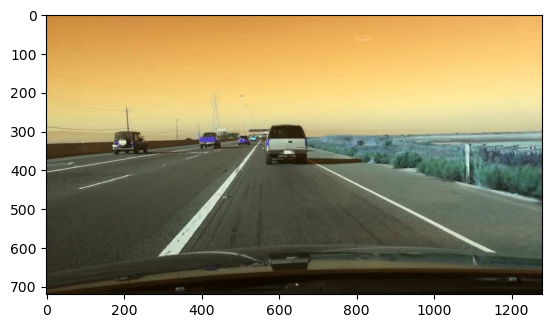

In [19]:
plt.imshow(raw_img)

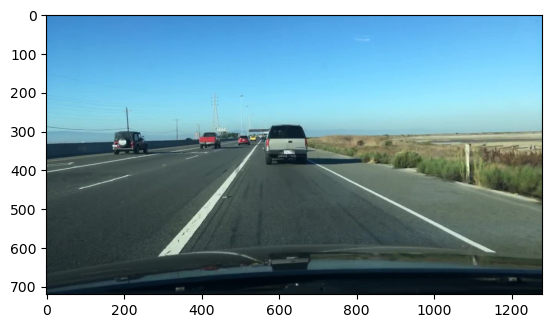

In [20]:
img = cv2.cvtColor(raw_img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [30]:
ClassIndex, confidece, bbox = model.detect(img,confThreshold=0.5)

In [27]:
#print(ClassIndex)

[3 8 3 3 8 3 3]


In [38]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
    cv2.rectangle(raw_img,boxes,(255,0,0),2)
    cv2.putText(raw_img,classLables[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale = font_scale,color=(0,255,0),thickness=3)

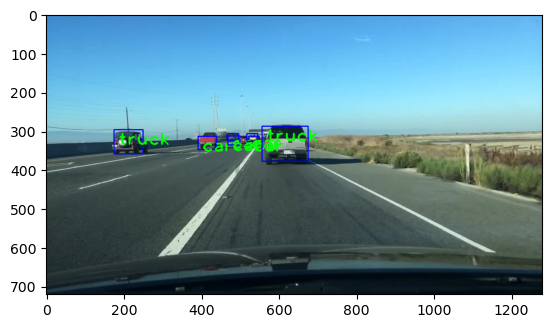

In [39]:
plt.imshow(cv2.cvtColor(raw_img,cv2.COLOR_BGR2RGB))